In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu

In [19]:
perfMeasurement1 = np.array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18, 20, 17, 31, 20, 25, 28, 21, 27])
perfMeasurement2 = np.array([21, 22, 15, 12, 21, 21, 19, 26, 22, 24, 17, 23, 19, 22, 20, 24, 18, 13, 29, 21, 19, 14, 23, 17, 20])

In [21]:
perfMeasurement1

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27])

In [22]:
perfMeasurement2

array([21, 22, 15, 12, 21, 21, 19, 26, 22, 24, 17, 23, 19, 22, 20, 24, 18,
       13, 29, 21, 19, 14, 23, 17, 20])

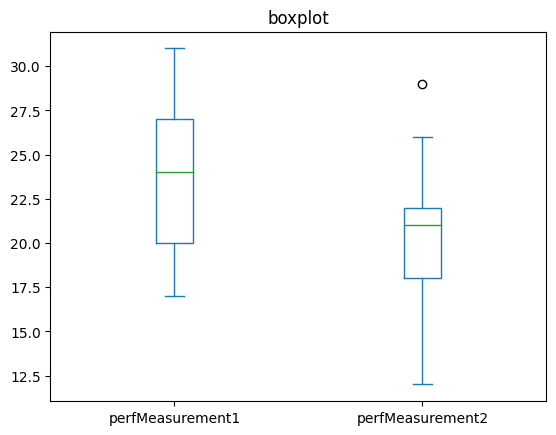

In [23]:
data = pd.DataFrame({"perfMeasurement1": perfMeasurement1, "perfMeasurement2": perfMeasurement2})
# Plot the dataframe
data[['perfMeasurement1', 'perfMeasurement2']].plot(kind='box', title='boxplot')
_ = plt.show()

In [24]:
np.mean(perfMeasurement1)

23.6

In [25]:
np.mean(perfMeasurement2)

20.08

In [26]:
test_mean = np.mean(perfMeasurement1) - np.mean(perfMeasurement2)
test_mean

3.520000000000003

In [27]:
concat = np.concatenate((perfMeasurement1, perfMeasurement2))

In [28]:
simulated_means = []

In [29]:
samples = 100000

In [30]:
for i in range(0, samples):
    np.random.shuffle(concat)
    simulated_means.append(
        np.mean(concat[:int(len(concat)/2)]) - np.mean(concat[int(len(concat)/2):])
    )

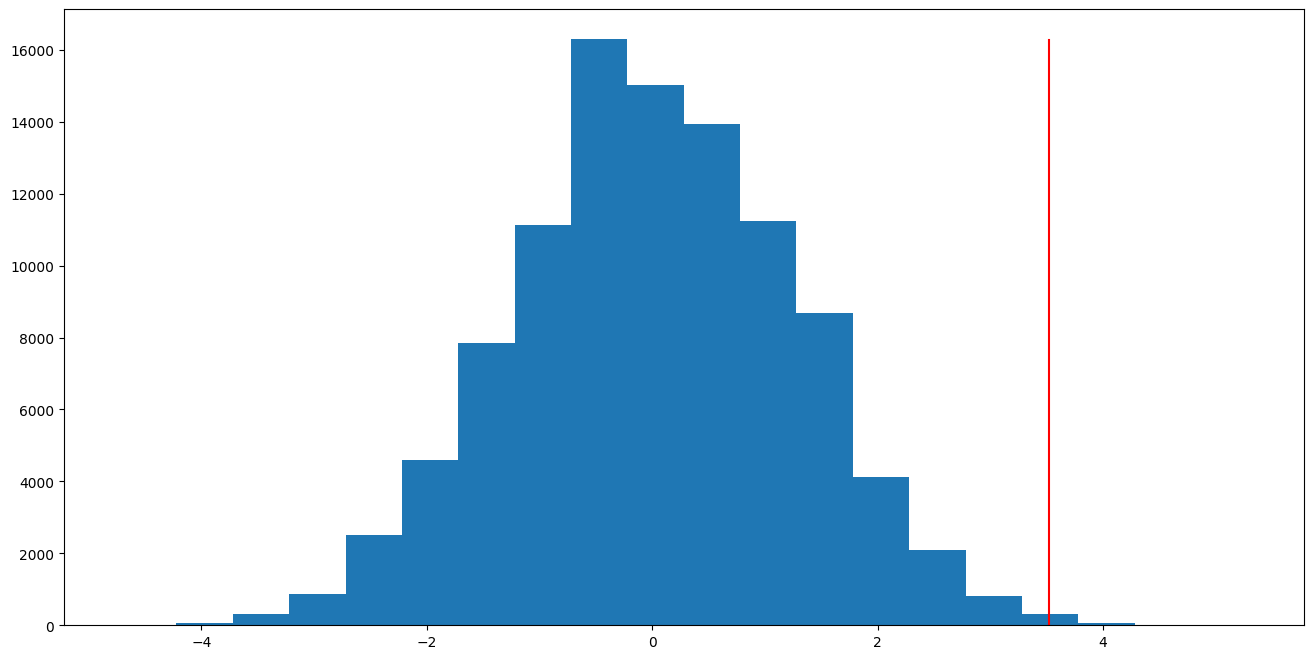

In [31]:
plt.figure(1, figsize=(16,8))
plt.hist(simulated_means, bins=20)
_ = plt.axvline(x=test_mean, ymax=0.95, linewidth=1.5, color="red")

In [32]:
alpha = 0.05

In [33]:
p_value = len(np.where(simulated_means >= test_mean)[0]) / samples
p_value

0.00204

In [34]:
if p_value > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


In [35]:
upper_bound = np.quantile(simulated_means, 0.975)
lower_bound = np.quantile(simulated_means, 0.025)

In [36]:
print(lower_bound.round(2), upper_bound.round(2), test_mean.round(2))

-2.4 2.4 3.52


In [37]:
stat, p = mannwhitneyu(perfMeasurement1, perfMeasurement2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=441.500, p=0.012
Different distribution (reject H0)
